# Random Forest Classifier

Random Forest Classifier will use different samples to create many decision trees in order to determine the best classificaiton method. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('df_dummies.csv')

In [3]:
df= df.drop(columns=['Unnamed: 0'], axis=1)

In [4]:
X = df.drop(columns=['DepDelay'], axis=1)
y= df['DepDelay']

In [5]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2, train_size=.8, random_state=42)

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [7]:
scaler_X_train = scaler.transform(X_train)
scaler_X_test = scaler.transform(X_test)

#### Baseline RFC 

Rando Forest Classifier will be used to

In [8]:
rfc = RandomForestClassifier()
rfc.fit(scaler_X_train, y_train)

RandomForestClassifier()

In [9]:
df_col = list(df.columns)
df_col.remove('DepDelay')

In [10]:
df_feat = pd.DataFrame(rfc.feature_importances_, index=df_col, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feat

,feature importance
ArrTime,0.407422
Distance,0.262958
DayofMonth,0.153174
Month,0.086492
DayofWeek,0.072942
Dest_ORD,0.004835
Dest_DFW,0.003983
Dest_DEN,0.003403
Dest_LAX,0.003239
Dest_ATL,0.001551


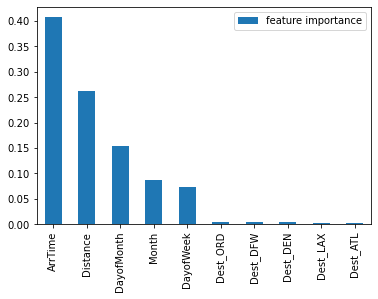

In [11]:
df_feat.plot(kind='bar');

##### Model Train

In [12]:
rfc_pred_train = rfc.predict(scaler_X_train)

In [13]:
print(classification_report(y_train, rfc_pred_train, target_names=['On Time', 'Delay']))

              precision    recall  f1-score   support

     On Time       1.00      1.00      1.00     44379
       Delay       1.00      1.00      1.00     85501

    accuracy                           1.00    129880
   macro avg       1.00      1.00      1.00    129880
weighted avg       1.00      1.00      1.00    129880



In [14]:
print('Mean Absolute Error:', mean_absolute_error(y_train, rfc_pred_train))
print('Mean Squared Error:', mean_squared_error(y_train, rfc_pred_train))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, rfc_pred_train)))

Mean Absolute Error: 0.000384970742223591
Mean Squared Error: 0.000384970742223591
Root Mean Squared Error: 0.019620671299004806


##### Model Test

In [15]:
rfc_pred_test = rfc.predict(scaler_X_test)

In [16]:
print(classification_report(y_test, rfc_pred_test, target_names=['On Time', 'Delay']))

              precision    recall  f1-score   support

     On Time       0.48      0.32      0.39     10962
       Delay       0.70      0.82      0.76     21509

    accuracy                           0.65     32471
   macro avg       0.59      0.57      0.57     32471
weighted avg       0.63      0.65      0.63     32471



In [17]:
print('Mean Absolute Error:', mean_absolute_error(y_test, rfc_pred_test))
print('Mean Squared Error:', mean_squared_error(y_test, rfc_pred_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, rfc_pred_test)))

Mean Absolute Error: 0.3458470635336146
Mean Squared Error: 0.3458470635336146
Root Mean Squared Error: 0.588087632529043


##### Confusion Matrix

In [18]:
base_cnf_matrix = confusion_matrix(y_test, rfc_pred_test)
base_cnf_matrix

array([[ 3522,  7440],
       [ 3790, 17719]], dtype=int64)

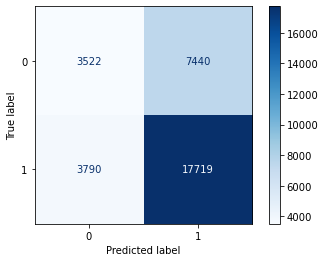

In [19]:
plot_confusion_matrix(rfc, scaler_X_test, y_test,
                      cmap=plt.cm.Blues)
plt.show()

#### Random Search

In [20]:
param_grid={
    'criterion':['gini', 'entropy'],
    'random_state': [1,20, 42, 100 ],
    'max_depth':[5,10,20,30,40,50,60,70],
    'min_samples_split':[5,10,20,25,30,40,50],
    'min_samples_leaf':[1,100,200,300,400,500]
            }

In [21]:
rfc_rand_search = RandomizedSearchCV(rfc, param_grid)

##### Model Train

In [22]:
rfc_rand_search.fit(scaler_X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 20, 30, 40, 50, 60,
                                                      70],
                                        'min_samples_leaf': [1, 100, 200, 300,
                                                             400, 500],
                                        'min_samples_split': [5, 10, 20, 25, 30,
                                                              40, 50],
                                        'random_state': [1, 20, 42, 100]})

In [23]:
rfc_rand_search.best_params_

{'random_state': 1,
 'min_samples_split': 30,
 'min_samples_leaf': 1,
 'max_depth': 40,
 'criterion': 'entropy'}

In [24]:
rfc_rs_pred_train = rfc_rand_search.predict(scaler_X_train)

In [25]:
print(classification_report(y_train, rfc_rs_pred_train, target_names=['On Time', 'Delay']))

              precision    recall  f1-score   support

     On Time       0.92      0.38      0.54     44379
       Delay       0.75      0.98      0.85     85501

    accuracy                           0.78    129880
   macro avg       0.84      0.68      0.69    129880
weighted avg       0.81      0.78      0.74    129880



In [26]:
print('Mean Absolute Error:', mean_absolute_error(y_train, rfc_rs_pred_train))
print('Mean Squared Error:', mean_squared_error(y_train, rfc_rs_pred_train))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, rfc_rs_pred_train)))

Mean Absolute Error: 0.22363720357252848
Mean Squared Error: 0.22363720357252848
Root Mean Squared Error: 0.4729029536517281


##### Model Test

In [27]:
rfc_rs_pred_test = rfc_rand_search.predict(scaler_X_test)

In [28]:
print(classification_report(y_test, rfc_rs_pred_test, target_names=['On Time', 'Delay']))

              precision    recall  f1-score   support

     On Time       0.55      0.17      0.26     10962
       Delay       0.69      0.93      0.79     21509

    accuracy                           0.67     32471
   macro avg       0.62      0.55      0.52     32471
weighted avg       0.64      0.67      0.61     32471



In [29]:
print('Mean Absolute Error:', mean_absolute_error(y_test, rfc_rs_pred_test))
print('Mean Squared Error:', mean_squared_error(y_test, rfc_rs_pred_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, rfc_rs_pred_test)))

Mean Absolute Error: 0.32724585014320473
Mean Squared Error: 0.32724585014320473
Root Mean Squared Error: 0.5720540622556619


##### Confusion Matrix

In [30]:
cnf_matrix = confusion_matrix(y_test, rfc_rs_pred_test)
cnf_matrix

array([[ 1822,  9140],
       [ 1486, 20023]], dtype=int64)

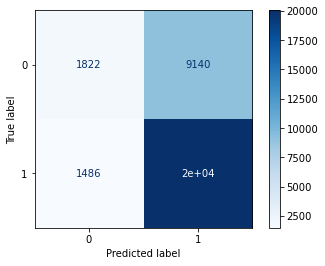

In [31]:
plot_confusion_matrix(rfc_rand_search, scaler_X_test, y_test,
                      cmap=plt.cm.Blues)
plt.show()

#### SMOTE 

In [32]:
smote = SMOTE()

##### Model Train

In [33]:
X_train_resampled, y_train_resampled = smote.fit_resample(scaler_X_train, y_train) 

In [34]:
rfc_smote_pred_train = rfc_rand_search.predict(X_train_resampled)

In [35]:
print(classification_report(y_train_resampled, rfc_smote_pred_train, target_names=['On Time', 'Delay']))

              precision    recall  f1-score   support

     On Time       0.95      0.33      0.49     85501
       Delay       0.60      0.98      0.74     85501

    accuracy                           0.66    171002
   macro avg       0.77      0.66      0.62    171002
weighted avg       0.77      0.66      0.62    171002



In [36]:
print('Mean Absolute Error:', mean_absolute_error(y_train_resampled, rfc_smote_pred_train))
print('Mean Squared Error:', mean_squared_error(y_train_resampled, rfc_smote_pred_train))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train_resampled, rfc_smote_pred_train)))

Mean Absolute Error: 0.34253400545022866
Mean Squared Error: 0.34253400545022866
Root Mean Squared Error: 0.5852640476316896


##### Model Test

In [37]:
X_test_resampled, y_test_resampled = smote.fit_resample(scaler_X_test, y_test) 

In [38]:
rfc_smote_pred_test = rfc_rand_search.predict(X_test_resampled)

In [39]:
print(classification_report(y_test_resampled, rfc_smote_pred_test, target_names=['On Time', 'Delay']))

              precision    recall  f1-score   support

     On Time       0.69      0.15      0.25     21509
       Delay       0.52      0.93      0.67     21509

    accuracy                           0.54     43018
   macro avg       0.61      0.54      0.46     43018
weighted avg       0.61      0.54      0.46     43018



In [40]:
print('Mean Absolute Error:', mean_absolute_error(y_test_resampled, rfc_smote_pred_test))
print('Mean Squared Error:', mean_squared_error(y_test_resampled, rfc_smote_pred_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_resampled, rfc_smote_pred_test)))

Mean Absolute Error: 0.4575061602120043
Mean Squared Error: 0.4575061602120043
Root Mean Squared Error: 0.6763920166678524


##### Confusion Matrix

In [41]:
cnf_matrix = confusion_matrix(y_test_resampled, rfc_smote_pred_test)
cnf_matrix

array([[ 3314, 18195],
       [ 1486, 20023]], dtype=int64)

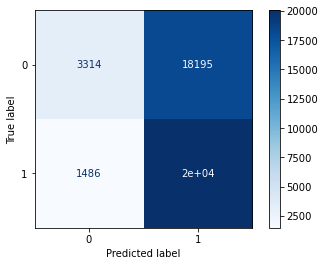

In [42]:
plot_confusion_matrix(rfc_rand_search, X_test_resampled, y_test_resampled,
                      cmap=plt.cm.Blues)
plt.show()